In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 9
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.1
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[9_10_51_300_0.1_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[9_10_51_300_0.1_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	997.1658

Best Fitness:	961.2581
Solution:	900.0000
Diff:		61.2581

[0:01:11][----------] 1.96% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	998.4332

Best Fitness:	954.5672
Solution:	900.0000
Diff:		54.5672

[0:02:02][----------] 3.92% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	998.6591

Best Fitness:	958.1080
Solution:	900.0000
Diff:		58.1080

[0:02:41][#---------] 5.88% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	995.6313

Best Fitness:	956.0019
Solution:	900.0000
Diff:		56.0019

[0:03:33][#---------] 7.84% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	989.1231

Best Fitness:	934.8057
Solution:	900.0000
Diff:		34.8057

[0:04:09][#---------] 9.80% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	998.8536

Best Fitness:	958.3605
Solution:	900.0000
Diff:		58.3605

[0:04:51][#---------] 11.76% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	992.2589

Best Fitness:	951.8669
Solution:	900.0000
Diff:		51.8669

[0:05:33][#---------] 13.73% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	991.4441

Best Fitness:	948.0235
Solution:	900.0000
Diff:		48.0235

[0:06:11][##--------] 15.69% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	996.1138

Best Fitness:	956.5597
Solution:	900.0000
Diff:		56.5597

[0:06:47][##--------] 17.65% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	987.3912

Best Fitness:	948.4123
Solution:	900.0000
Diff:		48.4123

[0:07:46][##--------] 19.61% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	989.8958

Best Fitness:	939.8468
Solution:	900.0000
Diff:		39.8468

[0:08:28][##--------] 21.57% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	985.7986

Best Fitness:	937.4708
Solution:	900.0000
Diff:		37.4708

[0:09:14][##--------] 23.53% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1004.7270

Best Fitness:	959.7445
Solution:	900.0000
Diff:		59.7445

[0:10:08][###-------] 25.49% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	993.3035

Best Fitness:	952.4330
Solution:	900.0000
Diff:		52.4330

[0:11:05][###-------] 27.45% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	990.7420

Best Fitness:	952.6473
Solution:	900.0000
Diff:		52.6473

[0:11:59][###-------] 29.41% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	997.2840

Best Fitness:	958.1407
Solution:	900.0000
Diff:		58.1407

[0:12:40][###-------] 31.37% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	996.9494

Best Fitness:	957.6722
Solution:	900.0000
Diff:		57.6722

[0:13:22][###-------] 33.33% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	991.3078

Best Fitness:	937.7431
Solution:	900.0000
Diff:		37.7431

[0:14:11][####------] 35.29% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	988.6981

Best Fitness:	941.3962
Solution:	900.0000
Diff:		41.3962

[0:15:02][####------] 37.25% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	998.8331

Best Fitness:	949.8908
Solution:	900.0000
Diff:		49.8908

[0:15:41][####------] 39.22% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	991.8040

Best Fitness:	954.3202
Solution:	900.0000
Diff:		54.3202

[0:16:22][####------] 41.18% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	989.4198

Best Fitness:	954.8624
Solution:	900.0000
Diff:		54.8624

[0:16:55][####------] 43.14% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	997.2070

Best Fitness:	955.5806
Solution:	900.0000
Diff:		55.5806

[0:17:36][#####-----] 45.10% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	1008.6283

Best Fitness:	970.2522
Solution:	900.0000
Diff:		70.2522

[0:18:15][#####-----] 47.06% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	990.7480

Best Fitness:	951.8618
Solution:	900.0000
Diff:		51.8618

[0:18:52][#####-----] 49.02% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	993.6182

Best Fitness:	943.4350
Solution:	900.0000
Diff:		43.4350

[0:19:34][#####-----] 50.98% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	996.8688

Best Fitness:	955.0381
Solution:	900.0000
Diff:		55.0381

[0:20:15][#####-----] 52.94% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	992.9334

Best Fitness:	943.3282
Solution:	900.0000
Diff:		43.3282

[0:20:59][#####-----] 54.90% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	996.6692

Best Fitness:	958.0810
Solution:	900.0000
Diff:		58.0810

[0:21:37][######----] 56.86% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	998.3055

Best Fitness:	958.7633
Solution:	900.0000
Diff:		58.7633

[0:22:15][######----] 58.82% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	996.5294

Best Fitness:	947.8125
Solution:	900.0000
Diff:		47.8125

[0:23:08][######----] 60.78% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	993.0915

Best Fitness:	943.4038
Solution:	900.0000
Diff:		43.4038

[0:23:56][######----] 62.75% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	994.3772

Best Fitness:	953.0611
Solution:	900.0000
Diff:		53.0611

[0:24:51][######----] 64.71% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	994.4929

Best Fitness:	944.6101
Solution:	900.0000
Diff:		44.6101

[0:25:38][#######---] 66.67% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	993.8268

Best Fitness:	939.5168
Solution:	900.0000
Diff:		39.5168

[0:26:14][#######---] 68.63% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	996.0643

Best Fitness:	952.3229
Solution:	900.0000
Diff:		52.3229

[0:26:57][#######---] 70.59% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	986.7344

Best Fitness:	946.0083
Solution:	900.0000
Diff:		46.0083

[0:27:40][#######---] 72.55% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	989.3027

Best Fitness:	953.5744
Solution:	900.0000
Diff:		53.5744

[0:28:26][#######---] 74.51% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	991.2602

Best Fitness:	936.0562
Solution:	900.0000
Diff:		36.0562

[0:29:08][########--] 76.47% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	997.1024

Best Fitness:	961.0112
Solution:	900.0000
Diff:		61.0112

[0:29:44][########--] 78.43% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	995.2600

Best Fitness:	955.6376
Solution:	900.0000
Diff:		55.6376

[0:30:31][########--] 80.39% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	986.8640

Best Fitness:	945.2056
Solution:	900.0000
Diff:		45.2056

[0:31:35][########--] 82.35% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	997.2686

Best Fitness:	958.8984
Solution:	900.0000
Diff:		58.8984

[0:32:10][########--] 84.31% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	991.4586

Best Fitness:	939.7596
Solution:	900.0000
Diff:		39.7596

[0:32:56][#########-] 86.27% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	992.5493

Best Fitness:	944.0076
Solution:	900.0000
Diff:		44.0076

[0:33:39][#########-] 88.24% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	999.7559

Best Fitness:	942.0727
Solution:	900.0000
Diff:		42.0727

[0:34:21][#########-] 90.20% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	991.3904

Best Fitness:	946.2785
Solution:	900.0000
Diff:		46.2785

[0:35:04][#########-] 92.16% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	996.2233

Best Fitness:	961.3096
Solution:	900.0000
Diff:		61.3096

[0:35:54][#########-] 94.12% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	994.7720

Best Fitness:	950.2508
Solution:	900.0000
Diff:		50.2508

[0:36:38][##########] 96.08% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	984.4074

Best Fitness:	949.7394
Solution:	900.0000
Diff:		49.7394

[0:37:15][##########] 98.04% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	992.4209

Best Fitness:	951.1622
Solution:	900.0000
Diff:		51.1622

[0:38:06][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:38:06

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
27,71.462138,82.975528,99.619961,104.289966,114.937694,94.681186,111.487478,97.12747,91.983707,102.728998,...,97.489951,124.360410,100.225362,88.191877,95.086348,92.514481,101.267587,84.813285,93.552469,50
28,71.462138,82.975528,99.619961,104.289966,114.937694,94.681186,111.487478,97.12747,91.983707,102.728998,...,97.489951,97.070834,100.225362,88.191877,95.086348,92.514481,101.267587,84.813285,93.552469,50
29,71.462138,82.975528,99.619961,104.289966,114.937694,94.681186,94.507270,97.12747,91.983707,102.728998,...,97.489951,97.070834,90.053843,88.191877,95.086348,92.514481,101.267587,84.813285,93.552469,50
30,71.462138,82.975528,99.619961,104.289966,95.140287,94.681186,94.507270,97.12747,91.983707,102.728998,...,97.489951,97.070834,90.053843,88.191877,95.086348,92.514481,101.267587,84.813285,93.552469,50
31,71.462138,82.975528,99.619961,104.289966,95.140287,94.681186,94.507270,97.12747,91.983707,102.728998,...,97.489951,97.070834,90.053843,88.191877,95.086348,92.514481,101.267587,84.813285,93.552469,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 61.25811406541186

Best error for run 1: 54.56717804812672

Best error for run 2: 58.108024905165166

Best error for run 3: 56.0019008219399

Best error for run 4: 34.805741709327776

Best error for run 5: 58.360453803475025

Best error for run 6: 51.866876820316065

Best error for run 7: 48.0234567058925

Best error for run 8: 56.55974134707856

Best error for run 9: 48.41226531397092

Best error for run 10: 39.8467531847831

Best error for run 11: 37.47079469096343

Best error for run 12: 59.74453026735773

Best error for run 13: 52.433001010785574

Best error for run 14: 52.64732671610818

Best error for run 15: 58.14065945311506

Best error for run 16: 57.67217817309597

Best error for run 17: 37.74310096499994

Best error for run 18: 41.396206300868585

Best error for run 19: 49.89081828757571

Best error for run 20: 54.3202218996081

Best error for run 21: 54.8624356096783

Best error for run 22: 55.58060055713963

Best error for run 23: 70.2522296242737

Best error for run 24: 51.86177473413136

Best error for run 25: 43.43502171419868

Best error for run 26: 55.03812132324981

Best error for run 27: 43.32824458899802

Best error for run 28: 58.08101439319125

Best error for run 29: 58.763340538720286

Best error for run 30: 47.81247376478768

Best error for run 31: 43.403758086037556

Best error for run 32: 53.06108141610639

Best error for run 33: 44.61013565666212

Best error for run 34: 39.51676193049798

Best error for run 35: 52.32291831269356

Best error for run 36: 46.00825178295247

Best error for run 37: 53.57435541939378

Best error for run 38: 36.05619954238307

Best error for run 39: 61.01120175158587

Best error for run 40: 55.6375686802877

Best error for run 41: 45.205616194626145

Best error for run 42: 58.89835429534912

Best error for run 43: 39.7595999863762

Best error for run 44: 44.007637402411774

Best error for run 45: 42.07274512753111

Best error for run 46: 46.27845162845961

Best error for run 47: 61.309632383074586

Best error for run 48: 50.250754415232905

Best error for run 49: 49.739354756176

Best error for run 50: 51.16221877221437

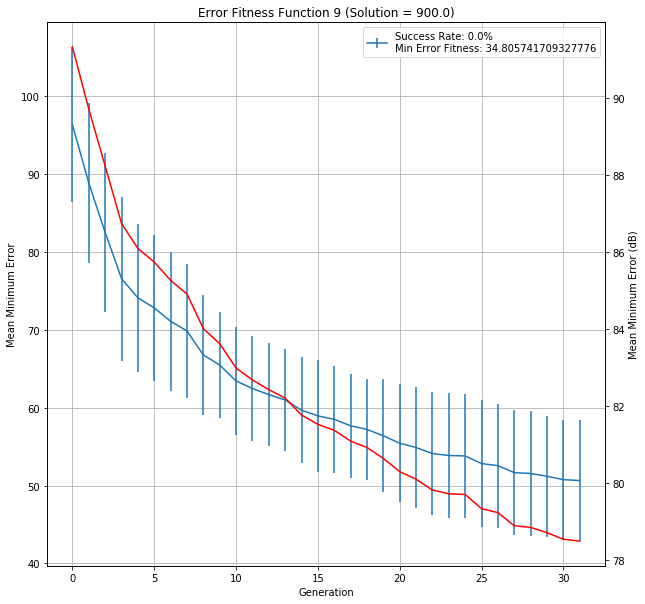

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[9_10_51_300_0.1_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,9,10,0.1,61.258114,54.567178,58.108025,56.001901,34.805742,58.360454,...,44.007637,42.072745,46.278452,61.309632,50.250754,49.739355,51.162219,50.630808,0:38:06,10200
